<a href="https://colab.research.google.com/github/SaladQueeny/Dilate-Filter-OpenCV/blob/main/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0_Dilate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фильтр Dilate



 


Фильтр использует соседние элементы по размеру ядра и берёт максимальное значение из всех соседей для текущего пикселя

Когда ядро ​​​​B сканируется по изображению, мы вычисляем максимальное значение пикселя, перекрываемое ядром B, и заменяем пиксель изображения в позиции точки привязки этим максимальным значением. 

Можно сделать вывод, эта операция максимизации приводит к тому, что яркие области в изображении «растут» (отсюда и название «расширение»).

Расширение увеличивает белую область на изображении.


**image**: это обязательный параметр и исходное изображение, на котором нам нужно выполнить расширение.

**kernel**: Обязательный параметр - матрица, с которой свернуто изображение.

**dst**: это выходное изображение того же размера и типа, что и изображение src.

**borderType**: показывает, какую границу нужно добавить.

**iterations**: это необязательный параметр, который требует нескольких итераций.

x', y' - значения из соседних пикселей.

## Исходная функция


$$dst(x,y)=max(x′,y′):element(x′,y′)\neq0$$

## Подготовка необходимых библиотек

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter

## Исходное изображение


Исходное изображение:


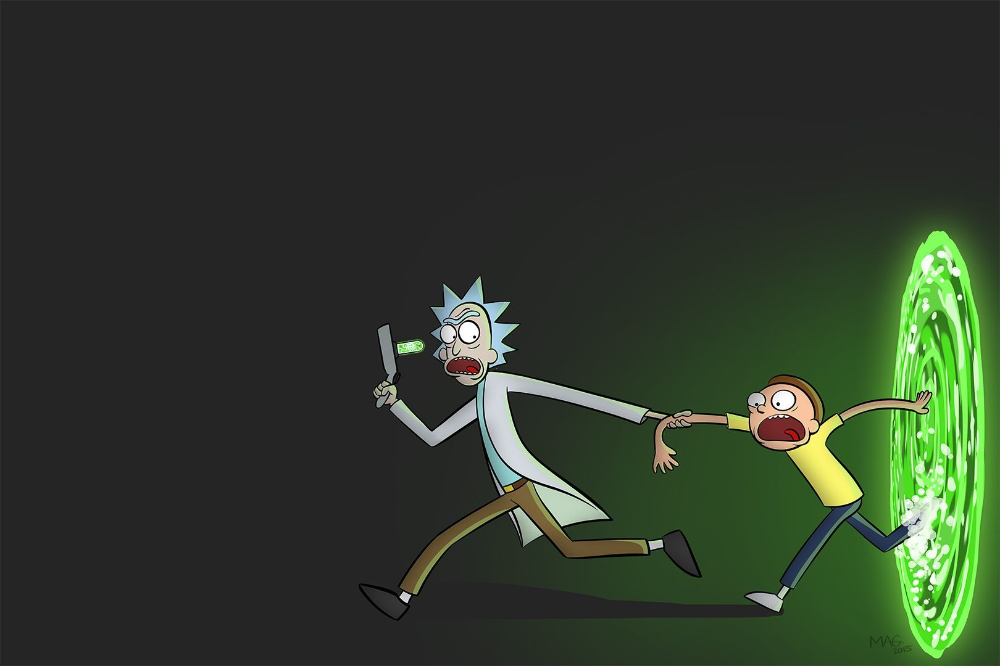

In [ ]:
# Исходное изображение
print("Исходное изображение:")
default_url = r'https://i.pinimg.com/originals/b2/f5/88/b2f58875e4d824c0d2372ed398243e33.png'
response = requests.get(default_url, stream = True).raw
img = np.asarray(bytearray(response.read()), dtype = "uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
cv2_imshow(img)


#Фильтр OpenCV Dilate код

In [ ]:
# делаем черно-белое изображение
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# выделяем границы из черно-белого изображения через Canny Edge Detection
edges = cv2.Canny(img, 100,200)
img = edges

# используем встроенный фильтр Dilate
kernel = np.ones((3, 3), 'uint8')
dilate_img = cv2.dilate(edges, kernel, iterations=1)

#Собственный фильтр код

In [ ]:
# Размер ядра
ksize = 3

In [ ]:
def myFunc(new_img, kernel, iterations):
  ksize = len(kernel)
#картинка с увеличенным размером, в центре которой исходная картинка
  width, height = img.shape[:2]
  new_img = np.zeros([width, height, 3], dtype=np.uint8)

  filled_help_img = np.zeros([width+ksize-1, height + ksize-1, 3], dtype=np.uint8)

  for i in range(ksize // 2, width + ksize // 2):
      for j in range(ksize // 2, height + ksize // 2):
        filled_help_img [i,j] = img [i - ksize // 2, j - ksize // 2]

  #параметры начала и конца работы цикла
  start_i = ksize // 2 - 1
  start_j = ksize // 2 - 1

  width_ksize = width + ksize//2
  height_ksize = height + ksize//2

  help_ksize = ksize

  while help_ksize <= ksize:
    for i in range(start_i, width_ksize+1, 1):
      for j in range(start_j, height_ksize+1, 1):

        #Для верхней левой точки
        if i == start_i and j == start_j:
          filled_help_img[i,j] = filled_help_img[i+1,j+1]

        #Для верхней правой точки
        elif i == start_i and j == height_ksize:
          filled_help_img[i,j] = filled_help_img[i+1,j-1]

        #Для нижней правой точки
        elif i == width_ksize and j == height_ksize:
          filled_help_img[i,j] = filled_help_img[i-1,j-1]
          
        #Для нижней левой точки
        elif i == width_ksize and j == start_j:
          filled_help_img[i,j] = filled_help_img[i-1,j+1]

        #Для верхней границы
        elif i == start_i and j != start_j and j != height_ksize:
          filled_help_img[i,j] = filled_help_img[i+1,j]

        #Для правой границы
        elif j == height_ksize and i != start_i and i != width_ksize:
          filled_help_img[i,j] = filled_help_img[i,j-1]

        #Для нижней границы
        elif i == width_ksize and j != start_j and j != height_ksize:
          filled_help_img[i,j] = filled_help_img[i-1,j]

        #Для левой границы
        elif j == start_j and i != start_i and i != width_ksize:
          filled_help_img[i,j] = filled_help_img[i,j+1]

    #Переходим к следующим границам
    start_i = start_i - 1
    start_j = start_j - 1

    width_ksize = width_ksize+1
    height_ksize = height_ksize+1

    help_ksize = help_ksize + 2

  #Шаг, на которое будет отступать счетчик
  move = ksize // 2

  for i in range(width):
    for j in range(height):
      maximum=(0, 0, 0)
      for p in range(i - move, i + move + 1):
        for q in range(j - move, j + move + 1):
          one = filled_help_img[p + move, q + move][0]
          two = maximum[0]
          if(one>two):
            maximum=filled_help_img[p + move, q + move]
      new_img[i,j] = maximum

  # Выводим полученное изображение
  
  return new_img



## Итоговое сравнение


Встроенный фильтр Dilate: 


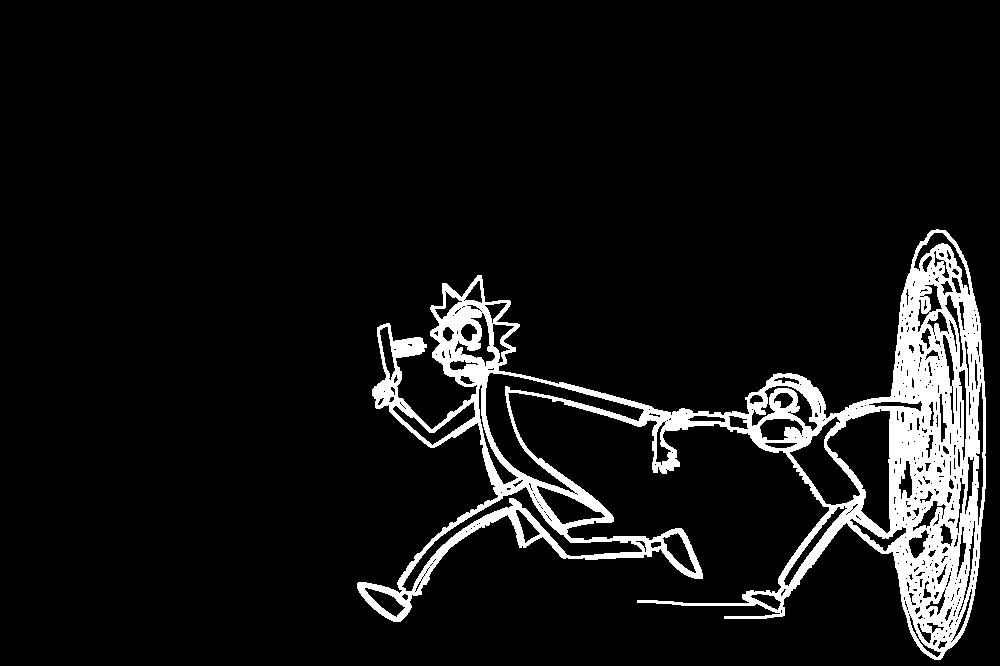

In [ ]:
print("Встроенный фильтр Dilate: ")
dilate_img = cv2.dilate(edges, kernel, iterations=1)
cv2_imshow(dilate_img)


Полученное изображение моей функцией: 


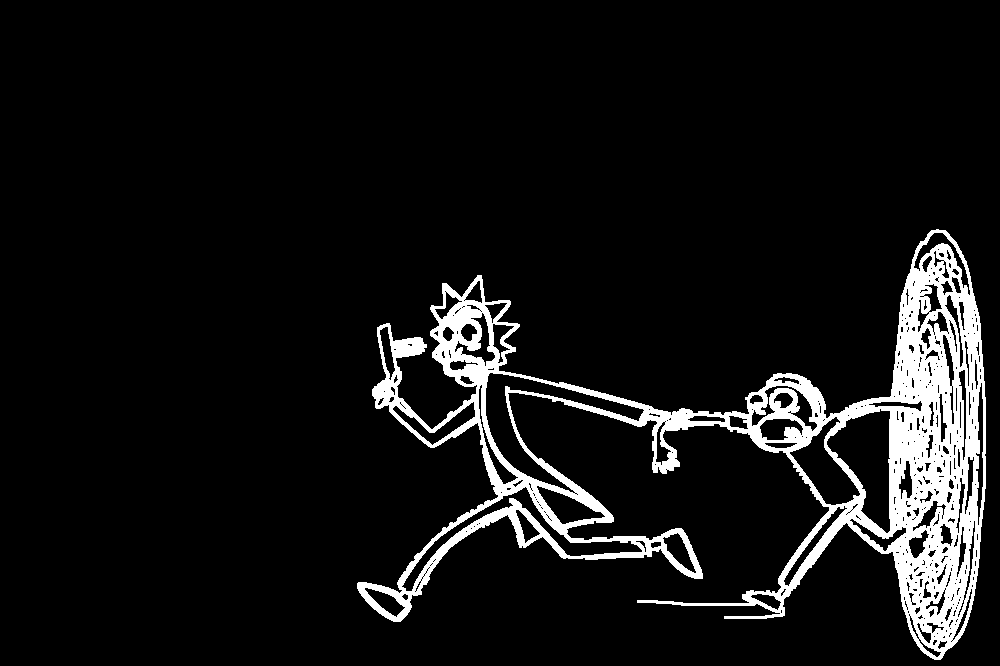

In [ ]:
#new_image = myFunc(img, ksize, 1)
new_image = myFunc(edges, kernel, iterations=1)
print("Полученное изображение моей функцией: ")
cv2_imshow(new_image)

Сравнение


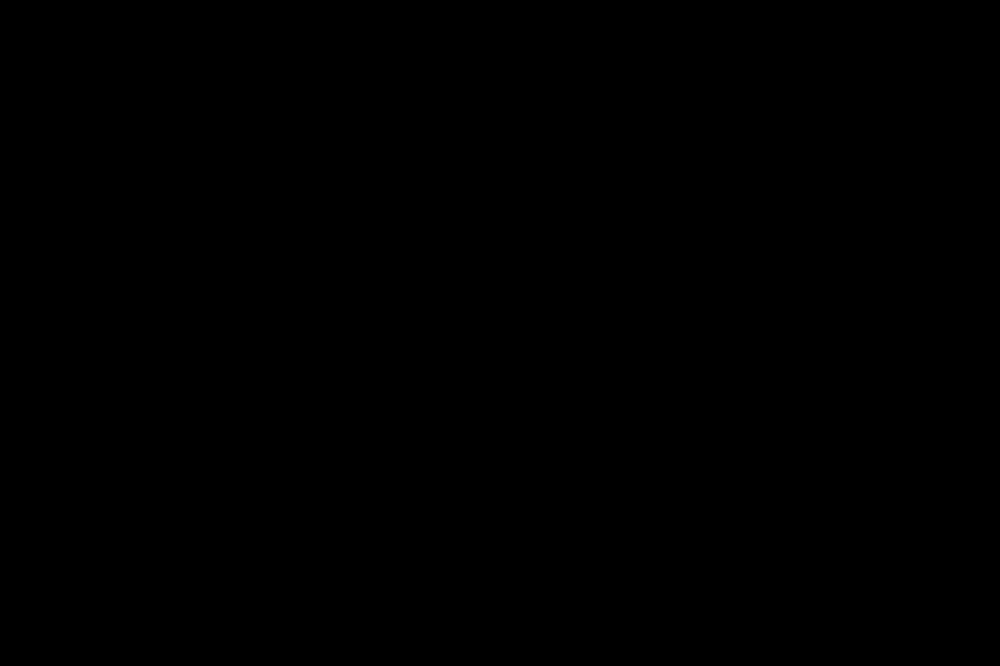

In [ ]:
width, height = img.shape[:2]
image_difference = np.zeros([width, height, 3], dtype=np.uint8)
for i in range(width):
  for j in range(height):
    image_difference[i,j] = new_image[i,j] - dilate_img[i,j]
print("Сравнение")
cv2_imshow(image_difference)